In [145]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
# reading in the dataset 
math_problems = pd.read_csv( 'C:\\Users\\gapar\\Downloads\\external_df.csv')
math_problems.head()

# Set up an SQLite connection
conn = sqlite3.connect(':memory:')  # In-memory database; you can replace ':memory:' with a file path

# Store the DataFrame as an SQL table
math_problems.to_sql('math_problems', conn, index=False, if_exists='replace')

12500

In [147]:
math_problems

,problem,level,type
0,Kevin Kangaroo begins hopping on a number line...,Level 5,Algebra
1,The ratio of the areas of two squares is $\fra...,Level 4,Algebra
2,"If $\sqrt{2\sqrt{t-2}} = \sqrt[4]{7 - t}$, the...",Level 4,Algebra
3,Let $t(x) = \sqrt{3x+1}$ and $f(x)=5-t(x)$. Wh...,Level 4,Algebra
4,James has a total of 66 dollars in his piggy b...,Level 2,Algebra
...,...,...,...
12495,Find the matrix $\mathbf{L} = \begin{pmatrix} ...,Level 2,Precalculus
12496,"Find all values of $x,$ $0 \le x \le 2 \pi,$ w...",Level 2,Precalculus
12497,"Let $\mathbf{a},$ $\mathbf{b},$ $\mathbf{c}$ b...",Level 4,Precalculus
12498,"Let $x$, $y$, and $z$ be real numbers such tha...",Level 4,Precalculus


In [148]:
math_problems.shape

(12500, 3)

In [149]:
# querying to get the count for the number of each type of problem 
query = """ SELECT type, COUNT(*) AS num_problems
            FROM math_problems 
            GROUP BY type 
            ORDER BY num_problems DESC;
"""
num_problems = pd.read_sql(query, conn)
num_problems

,type,num_problems
0,Algebra,2931
1,Intermediate Algebra,2198
2,Prealgebra,2076
3,Number Theory,1409
4,Geometry,1349
5,Precalculus,1292
6,Counting & Probability,1245


In [150]:
print(num_problems.dtypes)
num_problems['type'] = num_problems['type'].astype(str)
#num_problems = num_problems.drop(0, axis=0)

type            object
num_problems     int64
dtype: object


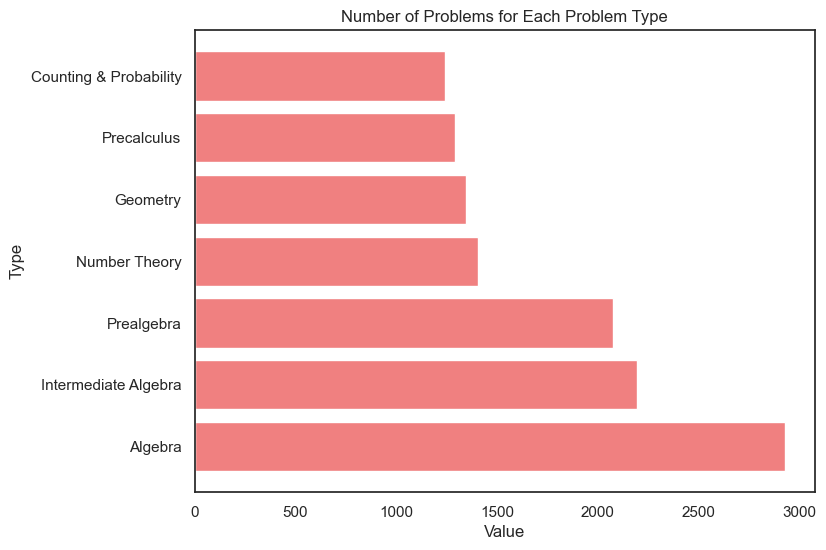

In [151]:
# creating a bar plot for the number of each problem type 
# plotting the number of each problem
plt.figure(figsize=(8, 6))
plt.barh(num_problems['type'], num_problems['num_problems'], color='lightcoral')
# Set labels and title
plt.xlabel('Value')
plt.ylabel('Type')
plt.title('Number of Problems for Each Problem Type')
plt.show()


In [152]:
# getting the number of level classifications for each problem type 
query = """ SELECT type, level, COUNT(*) AS num_problems
            FROM math_problems 
            GROUP BY type, level
            ORDER BY type, num_problems DESC;
"""
num_levels = pd.read_sql(query, conn)
num_levels

,type,level,num_problems
0,Algebra,Level 5,743
1,Algebra,Level 4,681
2,Algebra,Level 3,653
3,Algebra,Level 2,541
4,Algebra,Level 1,313
5,Counting & Probability,Level 5,399
6,Counting & Probability,Level 4,277
7,Counting & Probability,Level 3,260
8,Counting & Probability,Level 2,220
9,Counting & Probability,Level 1,89


In [153]:
# pivoting the data to be wide format 
num_level_wide = num_levels.pivot(index='type', columns='level', values='num_problems')
num_level_wide = num_level_wide.reset_index()

num_level_wide.columns

Index(['type', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'], dtype='object', name='level')

In [154]:
num_level_wide.head()
#num_level_wide = num_level_wide.drop(0, axis=0)

level,type,Level 1,Level 2,Level 3,Level 4,Level 5
0,Algebra,313,541,653,681,743
1,Counting & Probability,89,220,260,277,399
2,Geometry,79,184,231,302,553
3,Intermediate Algebra,110,295,496,588,709
4,Number Theory,77,223,313,329,467


In [155]:

#num_level_wide = num_level_wide.drop(columns=num_level_wide.columns[1], axis=1)


In [156]:
# checking the dataframe 
num_level_wide.head()

level,type,Level 1,Level 2,Level 3,Level 4,Level 5
0,Algebra,313,541,653,681,743
1,Counting & Probability,89,220,260,277,399
2,Geometry,79,184,231,302,553
3,Intermediate Algebra,110,295,496,588,709
4,Number Theory,77,223,313,329,467


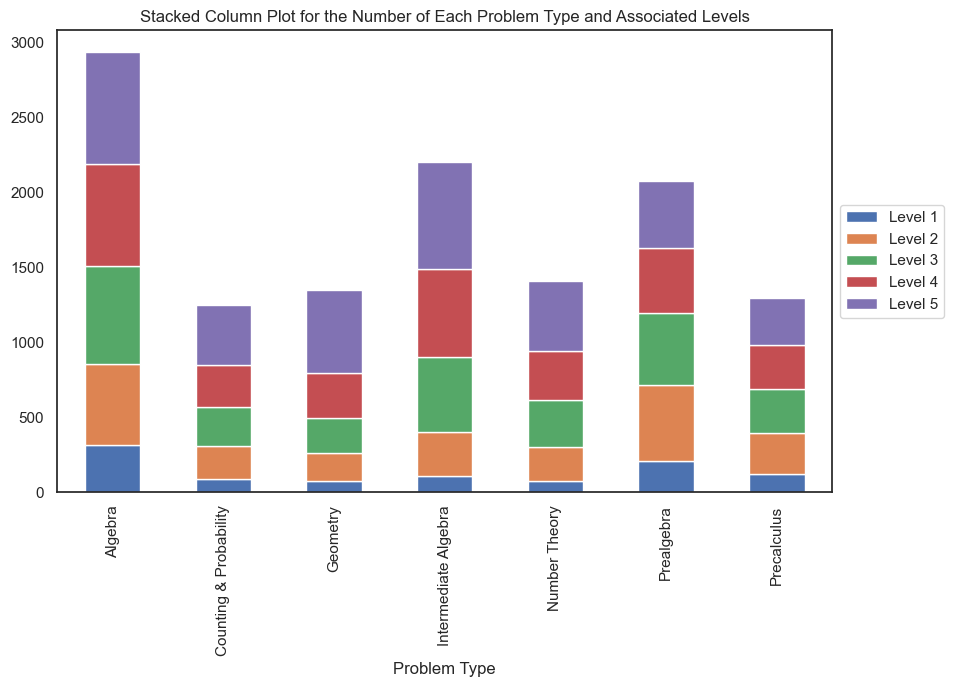

In [157]:
# plotting the number of each problem
sns.set(style='white')
ax = num_level_wide.set_index('type').plot(kind='bar', stacked=True, figsize=(10, 6))
# Set plot labels
ax.set_xlabel('Problem Type')
ax.set_title('Stacked Column Plot for the Number of Each Problem Type and Associated Levels')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [158]:
# adding a column with the length of each problem 
math_problems['problem_length'] = math_problems['problem'].str.len()
math_problems.head()

,problem,level,type,problem_length
0,Kevin Kangaroo begins hopping on a number line...,Level 5,Algebra,298.0
1,The ratio of the areas of two squares is $\fra...,Level 4,Algebra,265.0
2,"If $\sqrt{2\sqrt{t-2}} = \sqrt[4]{7 - t}$, the...",Level 4,Algebra,57.0
3,Let $t(x) = \sqrt{3x+1}$ and $f(x)=5-t(x)$. Wh...,Level 4,Algebra,62.0
4,James has a total of 66 dollars in his piggy b...,Level 2,Algebra,215.0


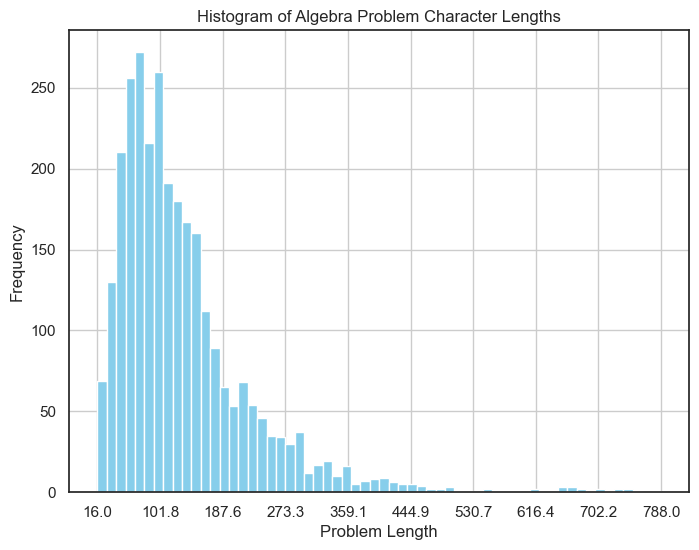

In [159]:
# creating a histogram of the problem length for ALGEBRA problems 
plt.figure(figsize=(8, 6))
algebra_probs = math_problems[math_problems['type'] == 'Algebra']
algebra_probs_filtered = algebra_probs[algebra_probs['problem_length'] <= 800]
algebra_probs_filtered['problem_length'].hist(bins=60, color='skyblue')
# Set labels and title
plt.xlabel('Problem Length')
plt.ylabel('Frequency')
plt.title('Histogram of Algebra Problem Character Lengths')
x_ticks = np.linspace(algebra_probs_filtered['problem_length'].min(), algebra_probs_filtered['problem_length'].max(), num=10)
plt.xticks(x_ticks)
# Show the plot
plt.show()

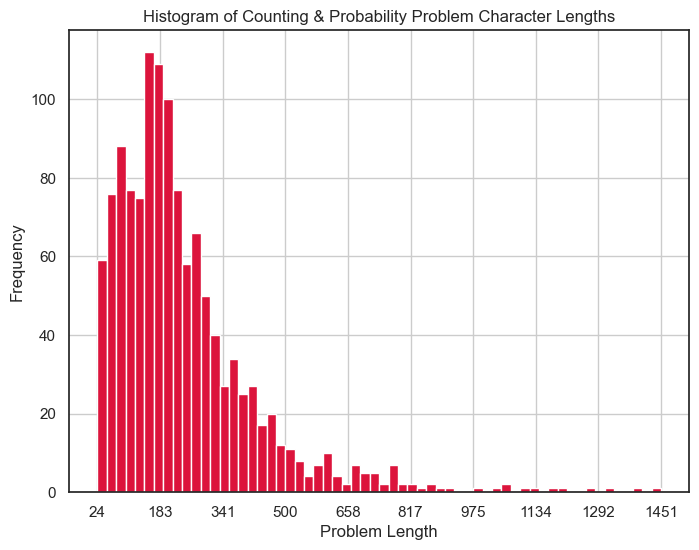

In [160]:
# creating a histogram of the problem length for COUNTING & PROBABILITY problems 
plt.figure(figsize=(8, 6))
counting_probs = math_problems[math_problems['type'] == 'Counting & Probability']
counting_probs_filtered = counting_probs[counting_probs['problem_length'] <= 1582]
counting_probs_filtered['problem_length'].hist(bins=60, color='crimson')
# Set labels and title
plt.xlabel('Problem Length')
plt.ylabel('Frequency')
plt.title('Histogram of Counting & Probability Problem Character Lengths')
x_ticks = np.linspace(counting_probs_filtered['problem_length'].min(), counting_probs_filtered['problem_length'].max(), num=10)
plt.xticks(x_ticks)
# Show the plot
plt.show()

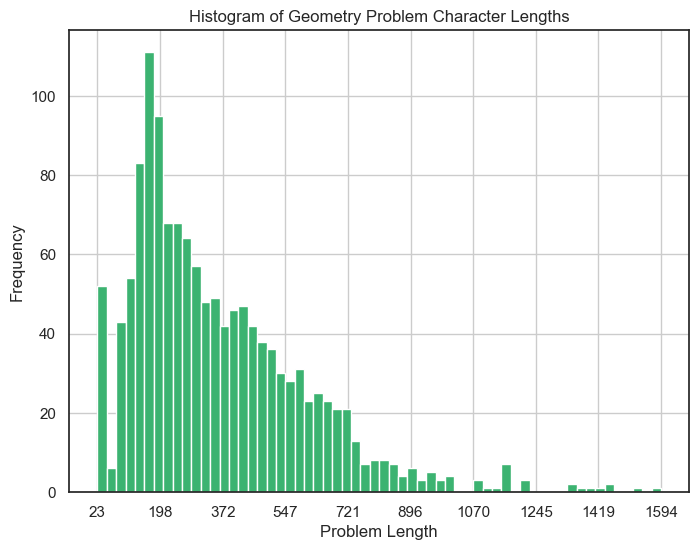

In [161]:
# creating a histogram of the problem length for GEOMETRY problems 
plt.figure(figsize=(8, 6))
geo_probs = math_problems[math_problems['type'] == 'Geometry']
geo_probs_filtered = geo_probs[geo_probs['problem_length'] <= 1928]
geo_probs_filtered['problem_length'].hist(bins=60, color='mediumseagreen')
# Set labels and title
plt.xlabel('Problem Length')
plt.ylabel('Frequency')
plt.title('Histogram of Geometry Problem Character Lengths')
x_ticks = np.linspace(geo_probs_filtered['problem_length'].min(), geo_probs_filtered['problem_length'].max(), num=10)
plt.xticks(x_ticks)
# Show the plot
plt.show()

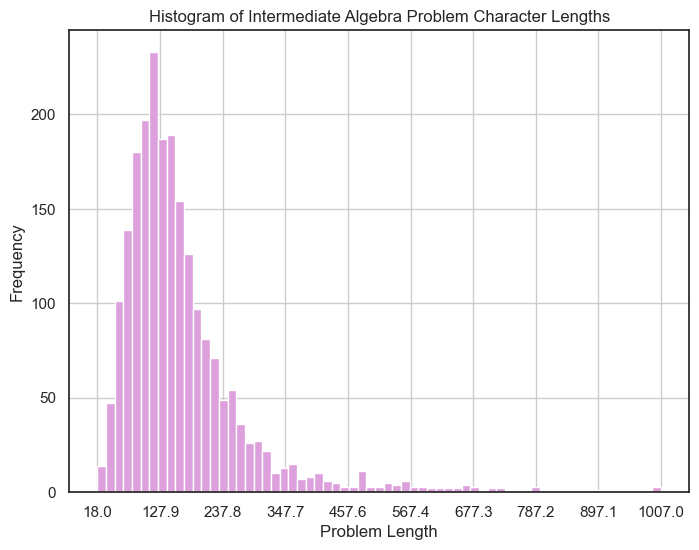

In [162]:
# creating a histogram of the problem length for INTERMEDIATE ALGEBRA problems 
plt.figure(figsize=(8, 6))
interalg_probs = math_problems[math_problems['type'] == 'Intermediate Algebra']
interalg_probs_filtered = interalg_probs[interalg_probs['problem_length'] <= 1094]
interalg_probs_filtered['problem_length'].hist(bins=65, color='plum')
# Set labels and title
plt.xlabel('Problem Length')
plt.ylabel('Frequency')
plt.title('Histogram of Intermediate Algebra Problem Character Lengths')
x_ticks = np.linspace(interalg_probs_filtered['problem_length'].min(), interalg_probs_filtered['problem_length'].max(), num=10)
plt.xticks(x_ticks)
# Show the plot
plt.show()

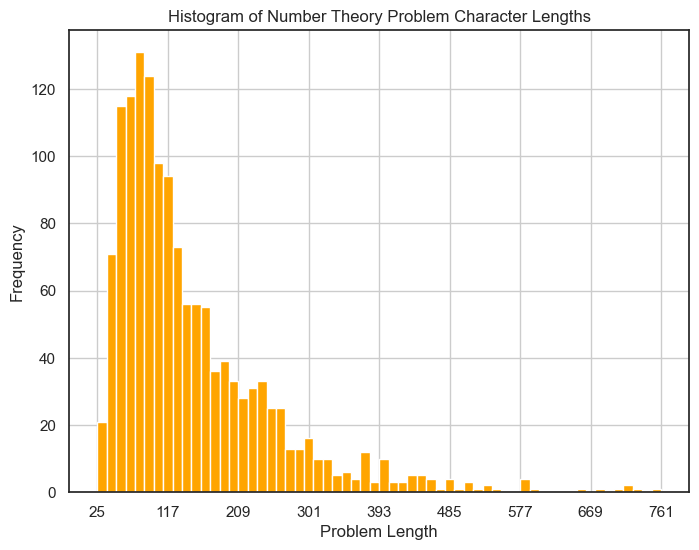

In [163]:
# creating a histogram of the problem length for NUMBER THEORY problems 
plt.figure(figsize=(8, 6))
ntheory_probs = math_problems[math_problems['type'] == 'Number Theory']
ntheory_probs['problem_length'].hist(bins=60, color='orange')
# Set labels and title
plt.xlabel('Problem Length')
plt.ylabel('Frequency')
plt.title('Histogram of Number Theory Problem Character Lengths')
x_ticks = np.linspace(ntheory_probs['problem_length'].min(), ntheory_probs['problem_length'].max(), num=9)
plt.xticks(x_ticks)
# Show the plot
plt.show()

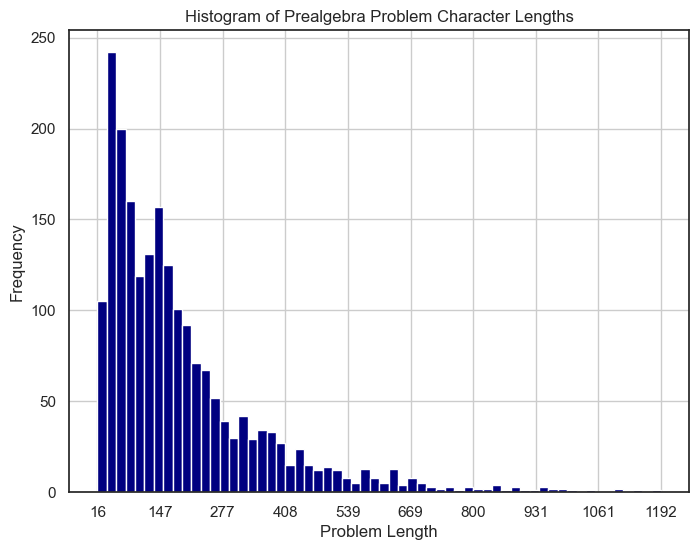

In [164]:
# creating a histogram of the problem length for PREALGEBRA problems 
plt.figure(figsize=(8, 6))
prealg_probs = math_problems[math_problems['type'] == 'Prealgebra']
prealg_probs_filtered = prealg_probs[prealg_probs['problem_length'] <= 1206]
prealg_probs_filtered['problem_length'].hist(bins=60, color='navy')
# Set labels and title
plt.xlabel('Problem Length')
plt.ylabel('Frequency')
plt.title('Histogram of Prealgebra Problem Character Lengths')
x_ticks = np.linspace(prealg_probs_filtered['problem_length'].min(), prealg_probs_filtered['problem_length'].max(), num=10)
plt.xticks(x_ticks)
# Show the plot
plt.show()

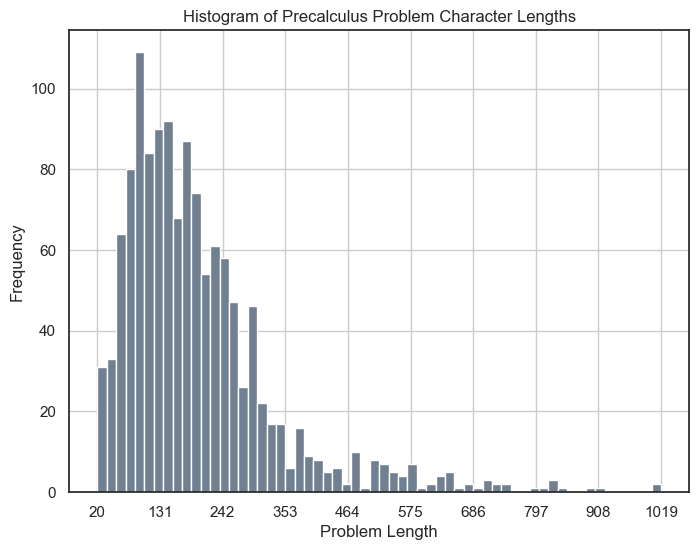

In [165]:
# creating a histogram of the problem length for PRECALCULUS problems 
plt.figure(figsize=(8, 6))
precalc_probs = math_problems[math_problems['type'] == 'Precalculus']
precalc_probs_filtered = precalc_probs[precalc_probs['problem_length'] <= 1079]
precalc_probs_filtered['problem_length'].hist(bins=60, color='slategray')
# Set labels and title
plt.xlabel('Problem Length')
plt.ylabel('Frequency')
plt.title('Histogram of Precalculus Problem Character Lengths')
x_ticks = np.linspace(precalc_probs_filtered['problem_length'].min(), precalc_probs_filtered['problem_length'].max(), num=10)
plt.xticks(x_ticks)
# Show the plot
plt.show()